In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def runge_kutta_4_ordem(f, x0, y0, h, n):
    print("\nMétodo de Runge-Kutta de 4ª Ordem\n")
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'K1':<15}{'K2':<15}{'K3':<15}{'K4':<15}{'|yn - yn-1|':<15}")
    print("-" * 106)

    x_vals = [x0]
    y_vals = [y0]

    for i in range(n):
        x_atual = x_vals[-1]
        y_atual = y_vals[-1]

        k1 = f(x_atual, y_atual)
        k2 = f(x_atual + h/2, y_atual + h*k1/2)
        k3 = f(x_atual + h/2, y_atual + h*k2/2)
        k4 = f(x_atual + h, y_atual + h*k3)

        y_next = y_atual + (k1 + 2*k2 + 2*k3 + k4)*h/6
        erro = '-' if i == 0 else abs(y_atual - y_vals[-2])

        print(f"{i:<6}{x_atual:<10.5f}{y_atual:<15.5f}"
              f"{k1:<15.5f}{k2:<15.5f}{k3:<15.5f}{k4:<15.5f}"
              f"{erro if erro == '-' else f'{erro:<15.5f}'}")

        x_vals.append(x_atual + h)
        y_vals.append(y_next)

    # Plot da solução e erro
    erros = [0] + [abs(y_vals[i] - y_vals[i-1]) for i in range(1, len(y_vals))]

    plt.figure(figsize=(12, 5))
    plt.plot(x_vals, y_vals, marker='o', label='y(x)')
    plt.plot(x_vals, erros, marker='x', linestyle='--', label='Erro |yᵢ - yᵢ₋₁|')
    plt.title('Solução e Erro - Método de Runge-Kutta de 4ª Ordem')
    plt.xlabel('x')
    plt.ylabel('y / erro')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(x_vals), np.array(y_vals)


Método de Runge-Kutta de 4ª Ordem

ITER. x0        y0             K1             K2             K3             K4             |yn - yn-1|    
----------------------------------------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        4.62000        4.68510        5.43072        -
1     1.10000   2.46735        5.42817        6.29914        6.39930        7.45747        0.46735        
2     1.20000   3.10539        7.45294        8.69509        8.85036        10.37511       0.63804        
3     1.30000   3.98737        10.36717       12.16548       12.40825       14.63896       0.88198        
4     1.40000   5.22327        14.62515       17.26812       17.65135       20.96520       1.23589        
5     1.50000   6.98042        20.94126       24.88520       25.49651       30.49623       1.75715        
6     1.60000   9.51710        30.45473       36.43147       37.41763       45.08015       2.53668        
7     1.70000  

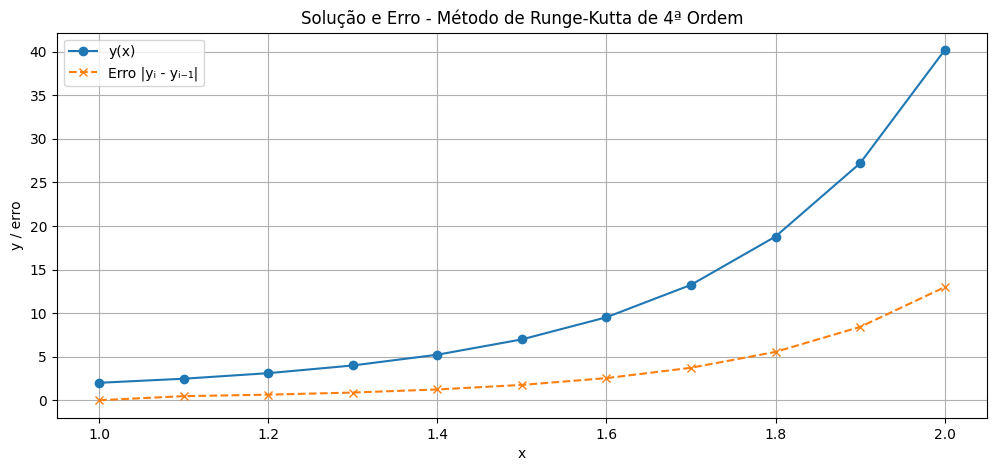

In [9]:
# Definição da função diferencial
f = lambda x, y: 2*x*y

# Condições iniciais
x0 = 1
y0 = 2
h = 0.1
n = 10

x_vals, y_vals = runge_kutta_4_ordem(f, x0, y0, h, n)